In [1]:
import os as os
import numpy as np
import pandas as pd
from keras.models import load_model
from Helper import F1Score, OpenerHelper
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
import dvc.api

In [2]:
MAIN_PATH = os.path.dirname(os.getcwd())
DATA_PATH = MAIN_PATH, "data"

In [3]:
def load_config():
    return dvc.api.params_show("params.yaml")

config = load_config()

In [4]:
model_path = r'C:\Master of Applied IT\models\best_model.h5'
# Load the model, passing the custom F1Score metric
model = load_model(model_path, custom_objects={'F1Score': F1Score})
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
x = OpenerHelper.load_data_from_pickle("C:\\Master of Applied IT\\data\\processed_data")

print(f"shape: {np.array(x['S16_unknown_windowed_data']['ACC']).shape}")

val_16 = np.array(x['S16_unknown_windowed_data'])
val_17 = np.array(x['S17_unknown_windowed_data'])

shape: (687, 256, 1)


In [20]:
t = x["x_test_1"]

t['TEMP'].shape

(703,)

In [ ]:
z= x["x_train"]
z

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

y = x['y_val']
# Generate predictions on the test set
y_pred_probs = model.predict([val_16[metric] for metric in config['model']['metrics']])
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_probs)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('val_model_results.png', dpi = 120)
plt.show()

KeyError: 'y_val'

In [119]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the test set
y_pred_probs = model.predict([x['x_test_1']], verbose=0)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_probs)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('val_model_results.png', dpi = 120)
plt.show()

ValueError: in user code:

    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\goert\.conda\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 3) dtype=string>]


In [10]:
def plot_metrics(history_list, metrics, val_metrics, colors):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(nrows=num_metrics, ncols=2, figsize=(28, 20))
    
    for i, (metric, val_metric) in enumerate(zip(metrics, val_metrics)):
        train_max = 0
        val_max = 0

        # Calculate max for train metrics
        for history in history_list:
            if metric in history["history"]:
                train_max = max(train_max, max(history["history"][metric]))

        # Calculate max for validation metrics
        for history in history_list:
            if val_metric in history["history"]:
                val_max = max(val_max, max(history["history"][val_metric]))

        y_max = max(train_max, val_max) if train_max > 0 and val_max > 0 else 1  # Ensure at least 1 for ylim

        for j, history in enumerate(history_list):
            color_index = j % len(colors)  # Get color index for this fold
            color = colors[color_index]     # Get color for this fold
            
            # Plot train metric if it exists
            if metric in history["history"]:
                axs[i, 0].plot(history["history"][metric], label=f'Fold {j+1} {metric}', color=color)
            
            # Plot validation metric if it exists
            if val_metric in history["history"]:
                axs[i, 1].plot(history["history"][val_metric], label=f'Fold {j+1} {val_metric}', linestyle='--', color=color)

        # Set titles, labels, and legends for training and validation metrics
        axs[i, 0].set_title(f'{metric.capitalize()} over Folds')
        axs[i, 0].set_xlabel('Epochs')
        axs[i, 0].set_ylabel(metric)
        axs[i, 0].legend(loc='best')  # Ensure legends are created
        axs[i, 0].grid()
        axs[i, 0].set_ylim([0, y_max])  # Set y-axis limit for training plot

        axs[i, 1].set_title(f'{val_metric.capitalize()} over Folds')
        axs[i, 1].set_xlabel('Epochs')
        axs[i, 1].set_ylabel(val_metric)
        axs[i, 1].legend(loc='best')  # Ensure legends are created
        axs[i, 1].grid()
        axs[i, 1].set_ylim([0, y_max])  # Set y-axis limit for validation plot

    plt.tight_layout()
    plt.savefig('../images/evaluation/folds.png')
    plt.show()

In [11]:
def main():
    # Load history from JSON files
    history_list = load_history_from_json(LOG_PATH)

    # Updated metrics list based on the actual keys from the history dictionary
    metrics = ['binary_accuracy', 'loss', 'auc', 'precision', 'recall', 'f1_score']
    val_metrics = ['val_binary_accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_f1_score']

    # Define a color scheme for metrics
    colors = ['b', 'g', 'r', 'y', 'k']

    # Plot the metrics
    plot_metrics(history_list, metrics, val_metrics, colors)

Loading history from d:\Master of Applied IT/logs\history_fold_1.json
Loading history from d:\Master of Applied IT/logs\history_fold_2.json
Loading history from d:\Master of Applied IT/logs\history_fold_3.json
Loading history from d:\Master of Applied IT/logs\history_fold_4.json
Loading history from d:\Master of Applied IT/logs\history_fold_5.json


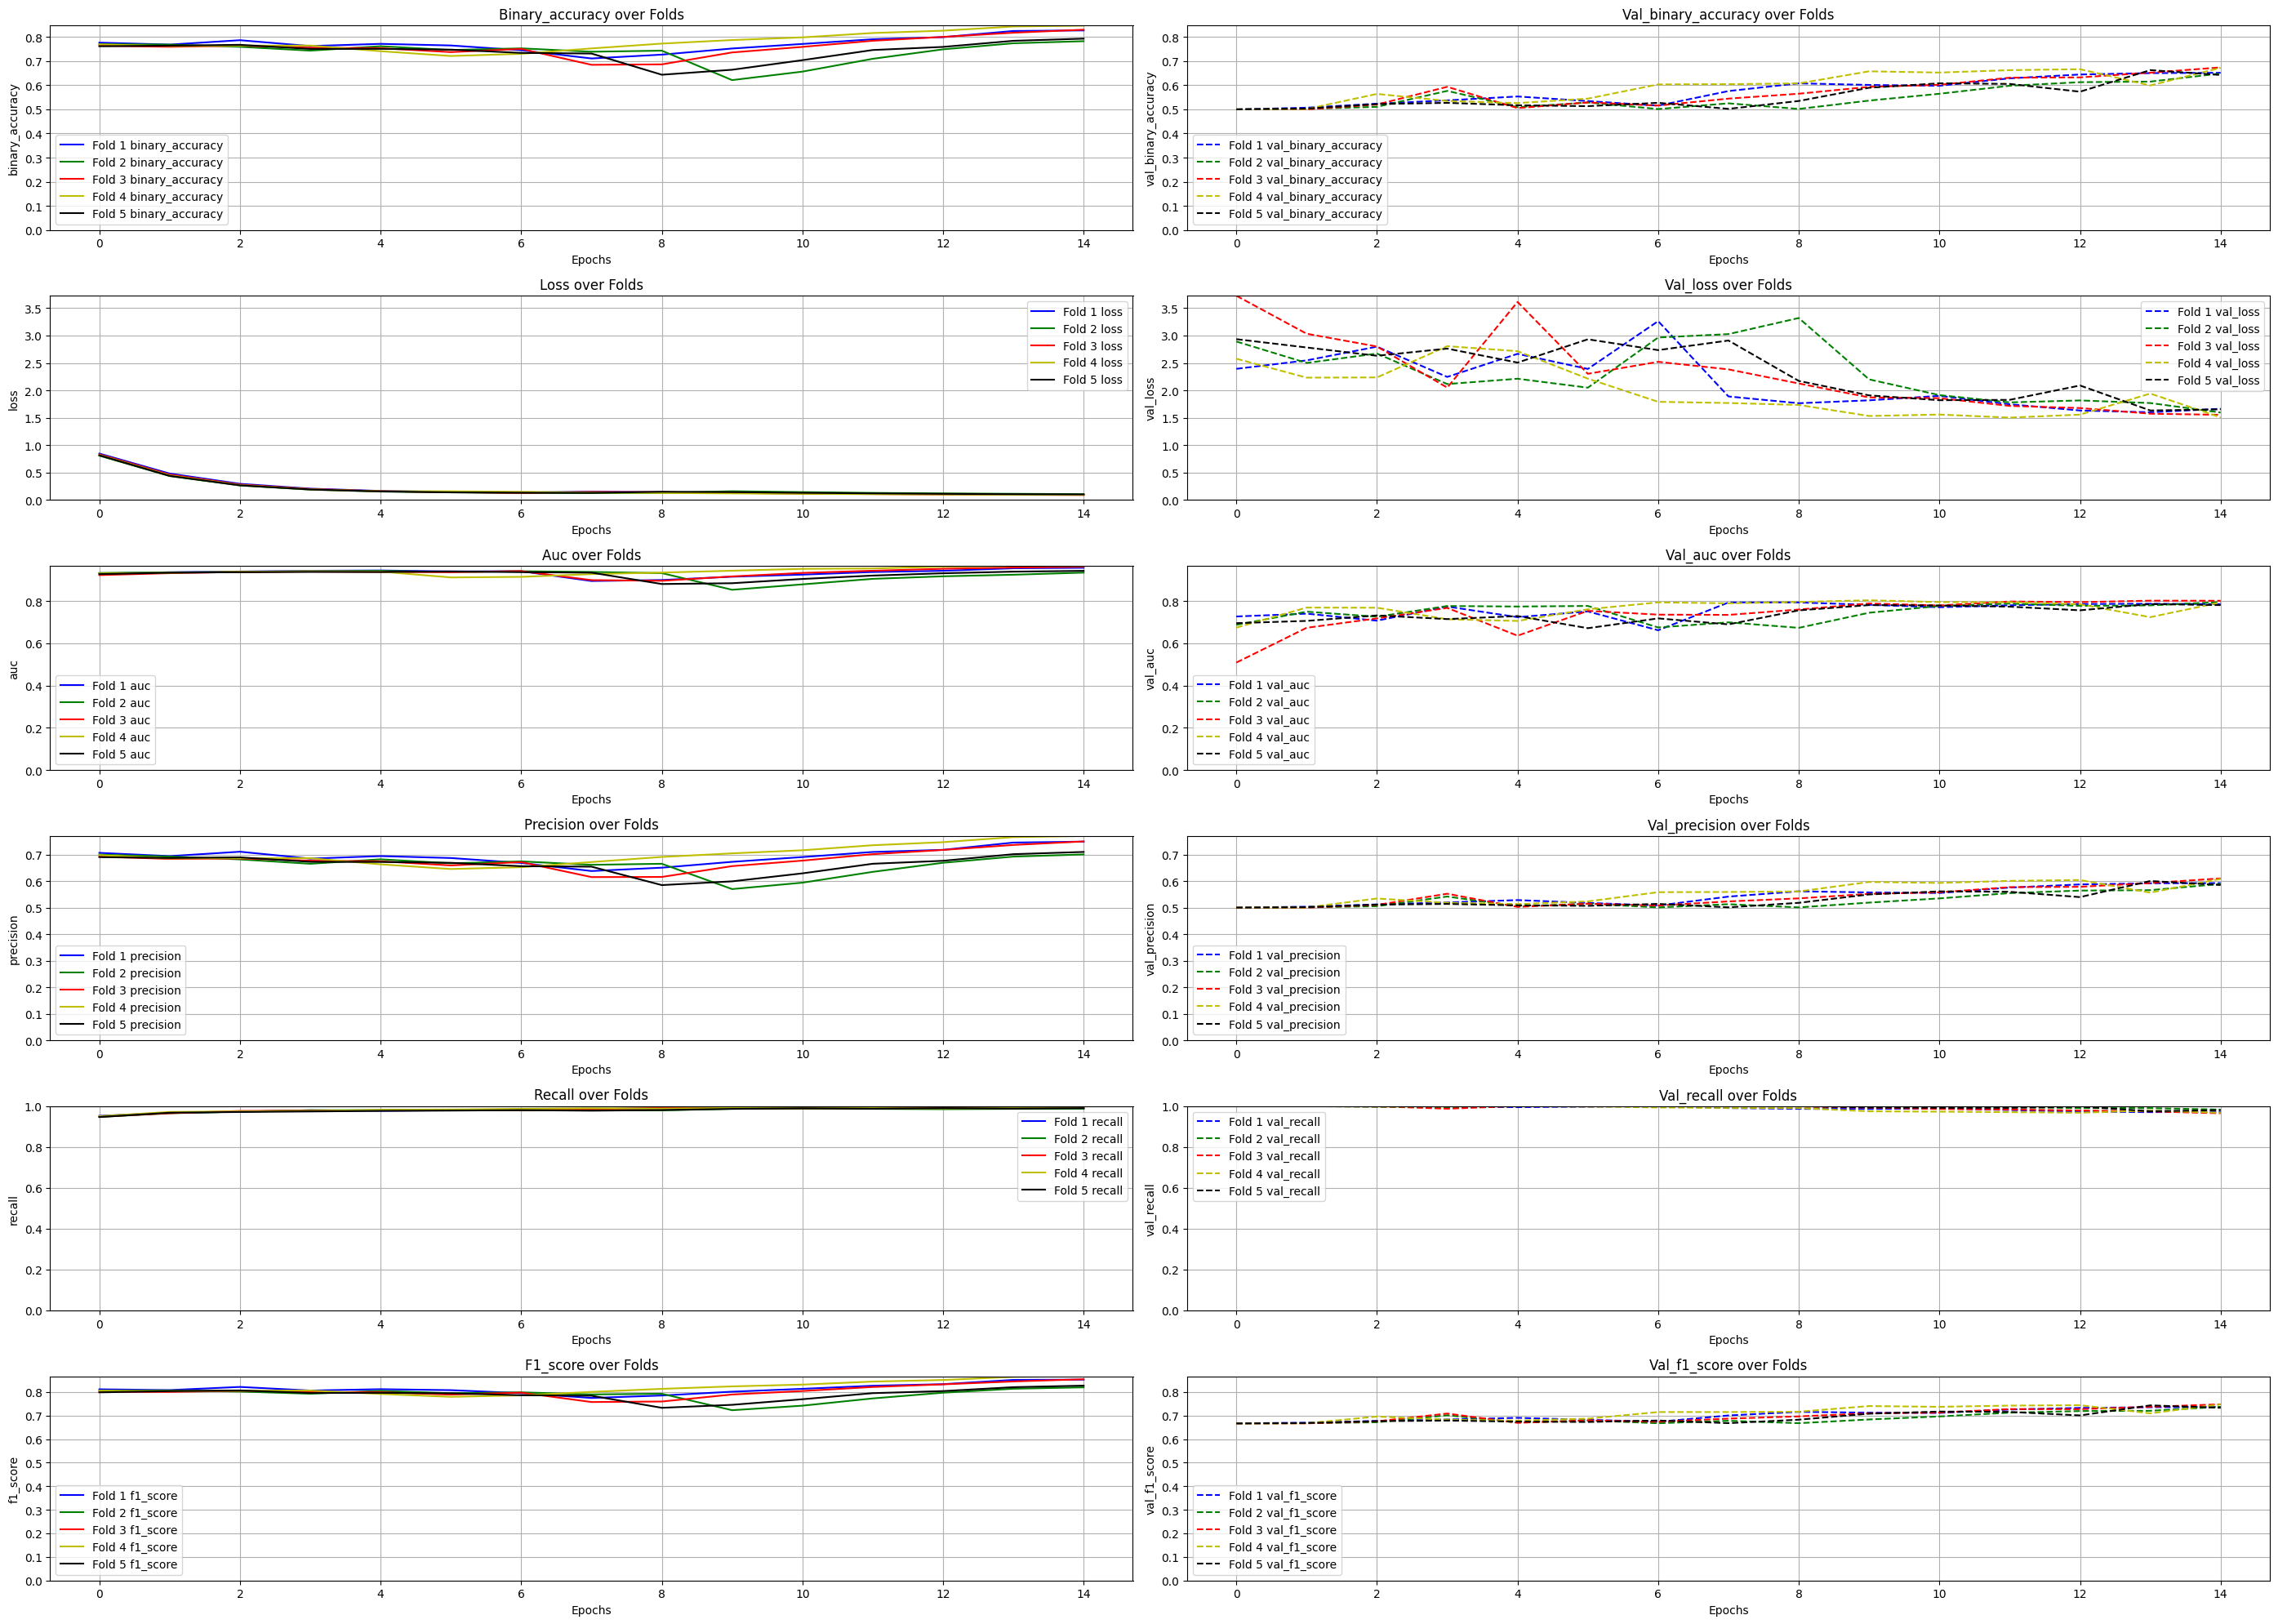

In [12]:
main()